In [1]:
#网络结构如下：
#输入层：2个神经元（输入特征维度为2）

#隐藏层：3个神经元，激活函数为 ReLU

#输出层：1个神经元，激活函数为 Sigmoid（用于二分类）

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [3]:
#计算relu函数
def relu(a):
  return np.maximum(0, a)

In [5]:
#计算sigmoid函数
def sigmoid(a):
  return 1/(1 + np.exp(-a))

In [6]:
#前向传播，计算y_pred输出
def forward(W1, W2, b1, b2, X):
  Z = np.dot(X, W1.T) + b1 # shape (3,3)
  H = relu(Z) # shape (3,3)

  Zout = np.dot(H, W2.T) + b2 # shape (3,1)
  y_pred = sigmoid(Zout) # shape (3,1)
  return Z, H, y_pred

In [19]:
#计算损失函数loss
def compute_loss(y_pred, y_true):
  loss = (y_pred - y_true)**2/2 # shape (3,1)
  return loss

In [13]:
#反向传播，梯度计算
def backward(y_pred, y_true, W2, H, Z, X):
  y_diff = y_pred - y_true

  dzout = y_diff * y_pred * (1- y_pred) #shape(3,1)
  b2_grad = np.mean(dzout, axis=0, keepdims=True) #shape (1,1)
  W2_grad = np.dot(dzout.T, H) # shape(1,3)

  dh = np.dot(dzout, W2) #shape (3,3)
  dz = dh * (Z>0)
  b1_grad = np.mean(dz, axis=0, keepdims=True).T
  W1_grad = np.dot(dz.T, X)
  return W1_grad, W2_grad, b1_grad, b2_grad

In [21]:
#更新参数纠正weight,bias
def update_params(W1, W2, b1, b2, W1_grad, W2_grad, b1_grad, b2_grad, learning_rate):
  W1 -= learning_rate * W1_grad
  W2 -= learning_rate * W2_grad
  b1 -= learning_rate * b1_grad
  b2 -= learning_rate * b2_grad
  return W1, W2, b1, b2

Epoch: 1 loss: [[0.1437]] W1_grad [-0.01  0.04 -0.01  0.05 -0.01  0.05] W2_grad [0.03 0.04 0.05] b1_grad [0.01 0.01 0.01] b2_grad [0.01]
Epoch: 11 loss: [[0.1288]] W1_grad [-0.01  0.05 -0.01  0.05 -0.02  0.06] W2_grad [0.03 0.04 0.05] b1_grad [0.01 0.01 0.01] b2_grad [0.02]
Epoch: 21 loss: [[0.1151]] W1_grad [-0.02  0.05 -0.02  0.05 -0.02  0.05] W2_grad [0.01 0.02 0.03] b1_grad [0.01 0.01 0.01] b2_grad [0.01]
Epoch: 31 loss: [[0.1052]] W1_grad [-0.02  0.04 -0.03  0.05 -0.03  0.05] W2_grad [-0. -0.  0.] b1_grad [0.   0.   0.01] b2_grad [0.01]
Epoch: 41 loss: [[0.0957]] W1_grad [-0.04 -0.03 -0.03  0.05 -0.03  0.05] W2_grad [-0.02 -0.02 -0.02] b1_grad [-0.02  0.    0.  ] b2_grad [0.01]
Epoch: 51 loss: [[0.0832]] W1_grad [-0.04 -0.03 -0.05 -0.03 -0.03  0.06] W2_grad [-0.02 -0.04 -0.03] b1_grad [-0.02 -0.02  0.01] b2_grad [0.01]
Epoch: 61 loss: [[0.068]] W1_grad [-0.04 -0.02 -0.04 -0.03 -0.04 -0.03] W2_grad [-0.03 -0.04 -0.04] b1_grad [-0.02 -0.02 -0.02] b2_grad [0.02]
Epoch: 71 loss: [[0.0

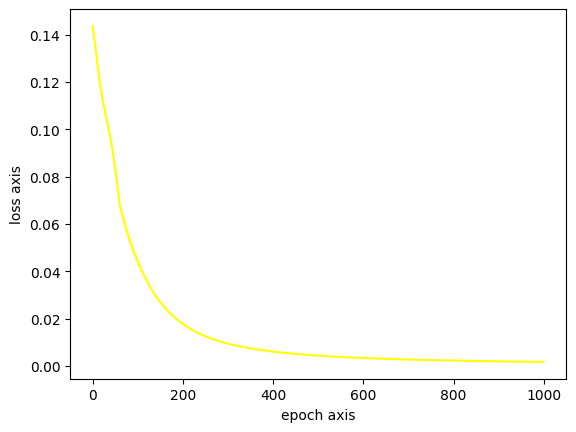

In [34]:
X = np.array([[0.5, 0.3],
        [0.8, 0.6],
        [0.2, 0.9]])  # shape: (3, 2)

y_true = np.array([[1], [1], [0]])  # shape: (3, 1)

W1 = np.array([[0.1, 0.2],
        [0.3, 0.4],
        [0.5, 0.6]])  # shape: (3, 2)

b1 = np.array([[0.1],
        [0.2],
        [0.3]])    # shape: (3, 1)

W2 = np.array([[0.7, 0.8, 0.9]])  # shape: (1, 3)
b2 = np.array([[0.4]])         # shape: (1, 1)

learning_rate = 0.3

epochs = 1000
losses = []

for epoch in range(epochs):
  Z, H, y_pred = forward(W1, W2, b1, b2, X)
  loss = compute_loss(y_pred, y_true)
  losses.append(loss.flatten().mean())

  W1_grad, W2_grad, b1_grad, b2_grad = backward(y_pred, y_true, W2, H, Z, X)
  W1, W2, b1, b2 = update_params(W1, W2, b1, b2, W1_grad, W2_grad, b1_grad, b2_grad, learning_rate)

  if epoch%10 == 0 :
    print("Epoch:", epoch + 1,
      "loss:", np.round(loss.mean(axis=0, keepdims=True), 4),
      "W1_grad", np.round(W1_grad.flatten(), 2),
      "W2_grad", np.round(W2_grad.flatten(), 2),
      "b1_grad", np.round(b1_grad.flatten(), 2),
      "b2_grad", np.round(b2_grad.flatten(), 2)
      )

plt.plot(range(epochs), losses, "yellow")
plt.xlabel("epoch axis")
plt.ylabel("loss axis")
plt.show()